<a href="https://colab.research.google.com/github/aekanun2020/Data-Analytics-using-Python/blob/main/Python_Pandas_ScikitLearn_RegressionwithEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! wget https://storage.googleapis.com/5-7sep2022/data/2008.csv

--2022-09-04 08:06:24--  https://storage.googleapis.com/5-7sep2022/data/2008.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689413344 (657M) [text/csv]
Saving to: ‘2008.csv’

2008.csv            100%[===================>] 657.48M   205MB/s    in 3.2s    

2022-09-04 08:06:28 (205 MB/s) - ‘2008.csv’ saved [689413344/689413344]



In [ ]:
! wc -l 2008.csv

7009729 2008.csv


In [ ]:
f = "2008.csv"
num_lines = sum(1 for l in open(f))
size = int(num_lines / 100)
import random
skip_idx = random.sample(range(1, num_lines), num_lines - size)
raw_pd = pd.read_csv(f, skiprows=skip_idx)

In [ ]:
#raw_pd = pd.read_csv("2008.csv")

In [ ]:
raw_pd.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1722.0,1700,1836.0,1815,WN,1061,...,4.0,7.0,0,NaN,0,4.0,0.0,0.0,0.0,17.0
1,2008,1,3,4,600.0,600,805.0,815,WN,277,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,1558.0,1245,1709.0,1405,WN,776,...,7.0,4.0,0,NaN,0,184.0,0.0,0.0,0.0,0.0
3,2008,1,3,4,1958.0,1930,2310.0,2250,WN,3829,...,5.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,20.0
4,2008,1,3,4,622.0,615,817.0,805,WN,561,...,7.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70096 entries, 0 to 70095
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70096 non-null  int64  
 1   Month              70096 non-null  int64  
 2   DayofMonth         70096 non-null  int64  
 3   DayOfWeek          70096 non-null  int64  
 4   DepTime            68789 non-null  float64
 5   CRSDepTime         70096 non-null  int64  
 6   ArrTime            68641 non-null  float64
 7   CRSArrTime         70096 non-null  int64  
 8   UniqueCarrier      70096 non-null  object 
 9   FlightNum          70096 non-null  int64  
 10  TailNum            69276 non-null  object 
 11  ActualElapsedTime  68603 non-null  float64
 12  CRSElapsedTime     70088 non-null  float64
 13  AirTime            68603 non-null  float64
 14  ArrDelay           68603 non-null  float64
 15  DepDelay           68789 non-null  float64
 16  Origin             700

In [ ]:
raw_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,70096.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.00,2008.0
Month,70096.0,6.380706,3.405836,1.0,3.0,6.0,9.00,12.0
DayofMonth,70096.0,15.659581,8.784155,1.0,8.0,16.0,23.00,31.0
DayOfWeek,70096.0,3.937486,1.982987,1.0,2.0,4.0,6.00,7.0
DepTime,68789.0,1335.280699,477.881057,1.0,929.0,1327.0,1728.00,2400.0
CRSDepTime,70096.0,1327.810446,464.087912,1.0,927.0,1320.0,1715.00,2359.0
ArrTime,68641.0,1482.526711,505.403735,1.0,1109.0,1514.0,1909.00,2400.0
CRSArrTime,70096.0,1496.193492,482.780252,1.0,1116.0,1518.0,1907.00,2400.0
FlightNum,70096.0,2221.377725,1963.984175,1.0,617.0,1568.0,3525.25,7829.0
ActualElapsedTime,68603.0,127.257379,70.051650,17.0,77.0,109.0,157.00,648.0


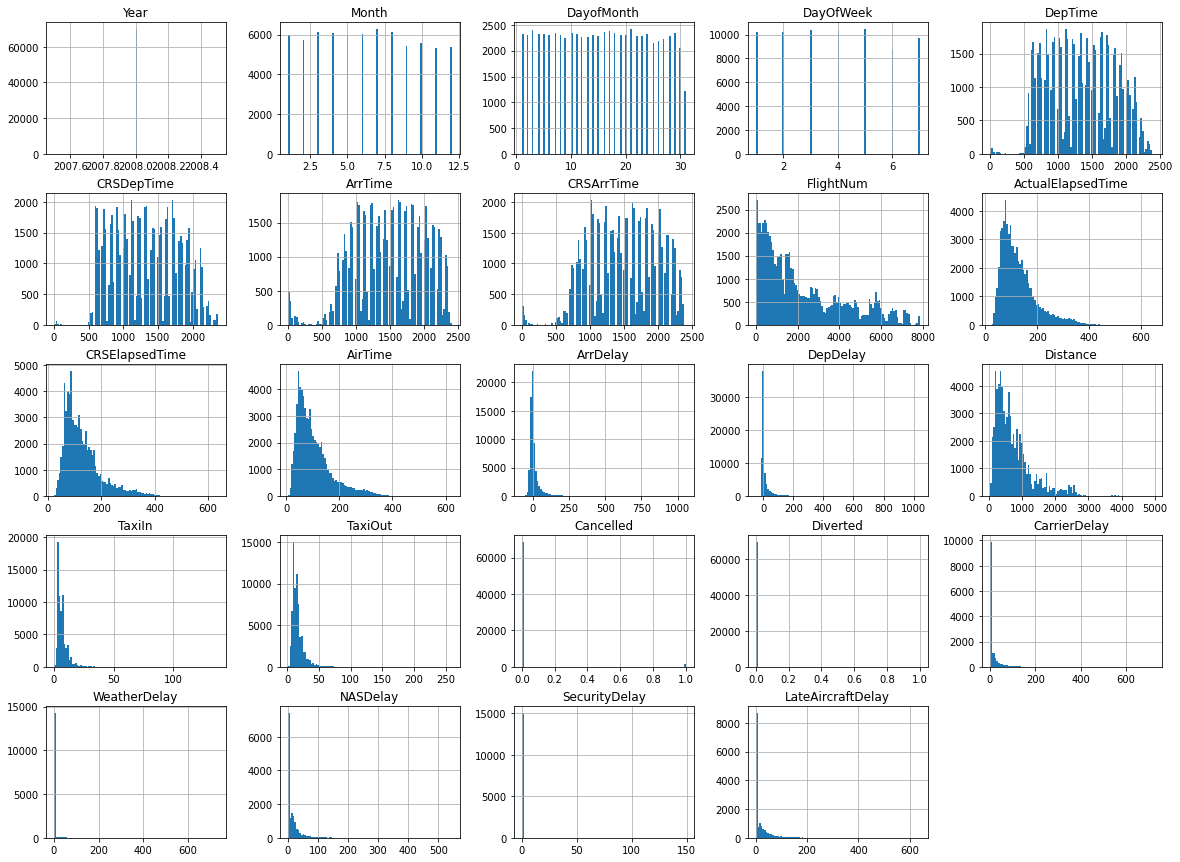

In [ ]:
raw_pd.hist(bins=100, figsize=(20,15))
plt.show()

In [45]:
raw_pd['Cancelled'].describe()

count    70096.000000
mean         0.018846
std          0.135980
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Cancelled, dtype: float64

In [46]:
raw_pd.groupby(by='Cancelled')['Cancelled'].count()

Cancelled
0    68775
1     1321
Name: Cancelled, dtype: int64

In [43]:
raw_pd['Diverted'].describe()

count    70096.000000
mean         0.002454
std          0.049475
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Diverted, dtype: float64

In [44]:
raw_pd.groupby(by='Diverted')['Diverted'].count()

Diverted
0    69924
1      172
Name: Diverted, dtype: int64

In [25]:
analysisCol_list = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']

In [31]:
raw_pd[analysisCol_list[0]].describe()

count    15150.000000
mean        15.765611
std         37.491591
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max        722.000000
Name: CarrierDelay, dtype: float64

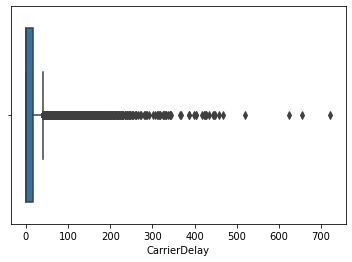

In [32]:
sns.boxplot(x=raw_pd[analysisCol_list[0]])

In [33]:
raw_pd[analysisCol_list[1]].describe()

count    15150.000000
mean         3.013993
std         19.638749
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        732.000000
Name: WeatherDelay, dtype: float64

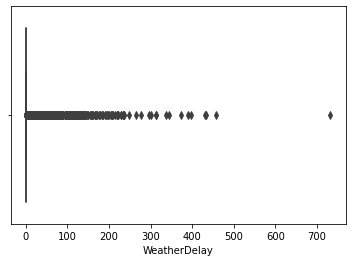

In [34]:
sns.boxplot(x=raw_pd[analysisCol_list[1]])

In [35]:
raw_pd[analysisCol_list[2]].describe()

count    15150.000000
mean        17.284818
std         31.444444
min          0.000000
25%          0.000000
50%          6.000000
75%         21.000000
max        544.000000
Name: NASDelay, dtype: float64

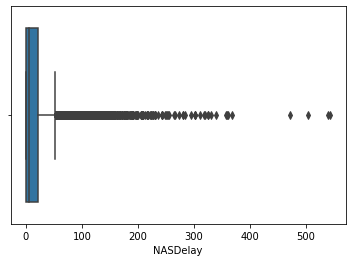

In [36]:
sns.boxplot(x=raw_pd[analysisCol_list[2]])

In [37]:
raw_pd[analysisCol_list[3]].describe()

count    15150.000000
mean         0.088845
std          2.016475
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        149.000000
Name: SecurityDelay, dtype: float64

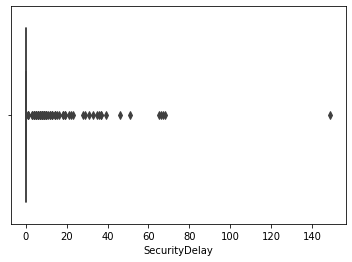

In [38]:
sns.boxplot(x=raw_pd[analysisCol_list[3]])

In [39]:
raw_pd[analysisCol_list[4]].describe()

count    15150.000000
mean        20.520726
std         38.432895
min          0.000000
25%          0.000000
50%          0.000000
75%         26.000000
max        638.000000
Name: LateAircraftDelay, dtype: float64

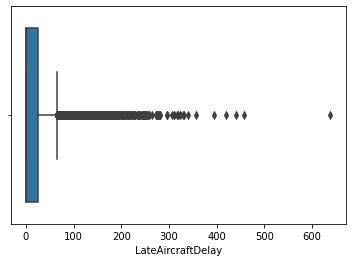

In [40]:
sns.boxplot(x=raw_pd[analysisCol_list[4]])

In [ ]:
raw_pd['ArrDelay'].describe()

count    68603.000000
mean         8.034313
std         37.616522
min        -75.000000
25%        -10.000000
50%         -2.000000
75%         12.000000
max       1054.000000
Name: ArrDelay, dtype: float64

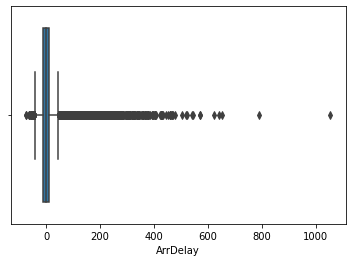

In [ ]:
sns.boxplot(x=raw_pd['ArrDelay'])

In [ ]:
raw_pd['DepDelay'].describe()

count    68789.000000
mean         9.797642
std         34.257904
min        -49.000000
25%         -4.000000
50%         -1.000000
75%          8.000000
max       1039.000000
Name: DepDelay, dtype: float64

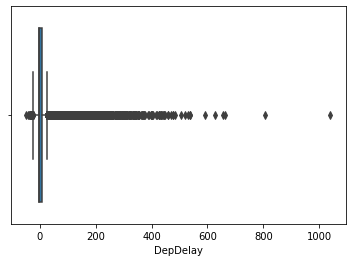

In [ ]:
sns.boxplot(x=raw_pd['DepDelay'])

In [ ]:
raw_pd['TaxiIn'].describe()

count    68641.000000
mean         6.851561
std          4.915336
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max        137.000000
Name: TaxiIn, dtype: float64

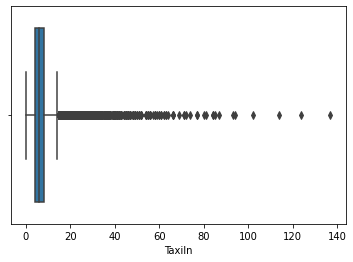

In [ ]:
sns.boxplot(x=raw_pd['TaxiIn'])

In [41]:
raw_pd['TaxiOut'].describe()

count    68780.000000
mean        16.435185
std         11.285580
min          1.000000
25%         10.000000
50%         14.000000
75%         19.000000
max        259.000000
Name: TaxiOut, dtype: float64

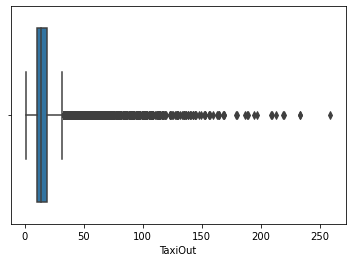

In [42]:
sns.boxplot(x=raw_pd['TaxiOut'])

In [ ]:
raw_pd['Distance'].describe()

count    70096.000000
mean       726.296921
std        561.088054
min         31.000000
25%        325.000000
50%        581.000000
75%        954.000000
max       4962.000000
Name: Distance, dtype: float64

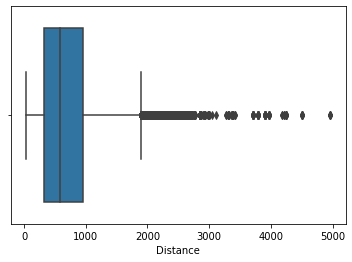

In [ ]:
sns.boxplot(x=raw_pd['Distance'])

In [ ]:
raw_pd['AirTime'].describe()

count    68603.000000
mean       103.973893
std         67.388403
min          7.000000
25%         56.000000
50%         86.000000
75%        132.000000
max        622.000000
Name: AirTime, dtype: float64

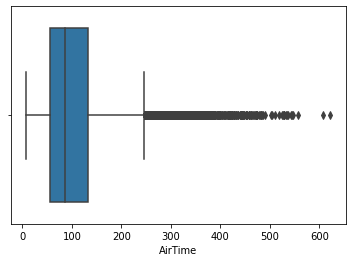

In [ ]:
sns.boxplot(x=raw_pd['AirTime'])

In [47]:
def t_timeperiod(origin):
    if origin is None:
        period = None
    elif origin > 0 and origin < 600:
        period = '00.01-05.59'
    elif origin >= 600 and origin <=1200:
        period = '06.00-11.59'
    elif origin >= 1200 and origin <= 1800:
        period = '12.00-17.59'
    elif origin >= 1800 and origin <= 2400:
        period = '18.00-24.00'
    else:
        period = 'NA'
    return period

In [48]:
raw_pd['DepTime'] = raw_pd['DepTime'].apply(lambda x:t_timeperiod(x))

In [49]:
max_distance = raw_pd['Distance'].max()
min_distance = raw_pd['Distance'].min()

In [50]:
max_ArrDelay = raw_pd['ArrDelay'].max()
min_ArrDelay = raw_pd['ArrDelay'].min()

In [51]:
def t_normalized_distance(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_distance)/(max_distance-min_distance))

In [52]:
def t_normalized_ArrDelay(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_ArrDelay)/(max_ArrDelay-min_ArrDelay))

In [53]:
raw_pd['Distance'] = raw_pd['Distance'].apply(lambda x:t_normalized_distance(x))

In [54]:
raw_pd['ArrDelay'] = raw_pd['ArrDelay'].apply(lambda x:t_normalized_ArrDelay(x))

In [55]:
features_pd = raw_pd[['UniqueCarrier','Origin','Dest',\
        'DepTime','TaxiOut','TaxiIn','DepDelay',\
        'DayOfWeek','Distance','ArrDelay']]

In [56]:
final_pd = features_pd.dropna()

In [57]:
final_pd.count()

UniqueCarrier    68603
Origin           68603
Dest             68603
DepTime          68603
TaxiOut          68603
TaxiIn           68603
DepDelay         68603
DayOfWeek        68603
Distance         68603
ArrDelay         68603
dtype: int64

In [58]:
features_pd.head(20)

,UniqueCarrier,Origin,Dest,DepTime,TaxiOut,TaxiIn,DepDelay,DayOfWeek,Distance,ArrDelay
0,WN,LAX,OAK,12.00-17.59,7.0,4.0,22.0,4,0.062056,0.085031
1,WN,LAX,PHX,06.00-11.59,10.0,4.0,0.0,4,0.068749,0.057573
2,WN,LAX,SFO,12.00-17.59,4.0,7.0,193.0,4,0.062056,0.229407
3,WN,MCI,BWI,18.00-24.00,9.0,5.0,28.0,4,0.189820,0.084145
4,WN,MCO,MDW,06.00-11.59,16.0,7.0,7.0,4,0.194281,0.077059
5,WN,MCO,MDW,12.00-17.59,13.0,7.0,0.0,4,0.194281,0.067316
6,WN,MDW,MCO,06.00-11.59,6.0,3.0,60.0,4,0.194281,0.106289
7,WN,MDW,SEA,06.00-11.59,13.0,5.0,29.0,4,0.345163,0.087688
8,WN,MDW,STL,06.00-11.59,8.0,3.0,98.0,4,0.044616,0.146147
9,WN,OAK,HOU,12.00-17.59,12.0,3.0,60.0,4,0.326709,0.105403


In [59]:


#raw_pd.isnull().sum()
#nullCol_series = raw_pd.isnull().sum()
#notNull_list = list(nullCol_series[nullCol_series == 0].index)
#notNull_list
#requiredCol_list = ['TaxiIn','TaxiOut','ArrDelay']
#selectedCol_list = notNull_list + requiredCol_list
#noNull_pd = raw_pd.loc[:,selectedCol_list].dropna()
#noNull_pd.isnull().sum()
#noNull_pd.describe()
#noNull_pd.info()

In [60]:
#final_pd = noNull_pd

In [61]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [62]:
train_df = final_pd.sample(frac=0.8,random_state=123)

In [63]:
test_df = final_pd.drop(train_df.index)

In [64]:
train_df.count()

UniqueCarrier    54882
Origin           54882
Dest             54882
DepTime          54882
TaxiOut          54882
TaxiIn           54882
DepDelay         54882
DayOfWeek        54882
Distance         54882
ArrDelay         54882
dtype: int64

In [65]:
test_df.count()

UniqueCarrier    13721
Origin           13721
Dest             13721
DepTime          13721
TaxiOut          13721
TaxiIn           13721
DepDelay         13721
DayOfWeek        13721
Distance         13721
ArrDelay         13721
dtype: int64

In [66]:
train_labels = train_df.filter(['ArrDelay'])
train_df = train_df.loc[:, train_df.columns != 'ArrDelay']

In [67]:
type(train_labels)

pandas.core.frame.DataFrame

In [68]:
test_labels = test_df.filter(['ArrDelay'])
test_df = test_df.loc[:, test_df.columns != 'ArrDelay']

In [69]:
X_train = train_df
X_test = test_df
y_train = train_labels
y_test = test_labels

In [70]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'Origin', 'Dest', 'DepTime']
Numerical columns are: ['TaxiOut', 'TaxiIn', 'DepDelay', 'DayOfWeek', 'Distance']


In [71]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [72]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #('imputer', SimpleImputer(strategy='median')),
                     #('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Model Training
pipe = Pipeline(steps=[('preprocessor', preprocessor),
              ('model', DecisionTreeRegressor(max_depth=None))])
pipeline_model = pipe.fit(X_train, y_train)

In [73]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = pipeline_model.predict(X_test)
print("\t RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("\t R2 score:", r2_score(y_test, predictions))

	 RMSE: 0.011698933962850185
	 R2 score: 0.8749760834132626
